In [1]:
import numpy as np
np.random.seed(45)
import pandas as pd
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set()
from descriptive_stat import frequency_table, pareto_plot

In [2]:
data_path = r'C:\Users\DucTRung\Desktop\data_set\lux_stay'

In [3]:
df = pd.read_csv(data_path+'\luxstay_dataset.csv')

In [4]:
df.head(4)

,id,num_bedrooms,num_bathrooms,num_beds,max_guests,booking_type,review_count,rating,checkin_price,nightly_price,weekly_price,cleaning_fee,additional_guests_fee,additional_children_fee,additional_infants_fee,standard_guests,standard_children,standard_infants,min_stay,max_stay,property_type,provice,district,exp_type,region
0,29329,2.0,2.0,2.0,4,instant_book,1,5.0,82.87,82.87,82.87,8.77,8.77,0.0,0.0,4,4,0,1,0,Condominium,HaNoi,BaDinh,Urban,North
1,36402,2.0,2.0,2.0,4,instant_book,7,5.0,46.04,46.04,65.77,0.00,0.00,0.0,0.0,4,4,0,1,0,Condominium,HoChiMinh,Quan4,Urban,South
2,37069,1.0,1.0,1.0,2,instant_book,5,5.0,78.92,78.92,92.08,0.00,0.00,0.0,0.0,1,1,0,1,1,Condominium,HoChiMinh,BinhThanh,Urban,South
3,36712,1.0,1.0,1.0,2,instant_book,5,5.0,30.69,30.69,32.88,0.00,0.00,0.0,0.0,2,2,0,2,1,Condominium,HoChiMinh,Quan4,Urban,South


In [5]:
df.shape

(7979, 25)

### Shape
* 7979 samples
* 25 features

In [6]:
city = df['provice'].value_counts(ascending=False)

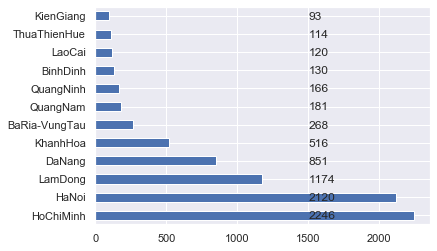

In [7]:
city.plot(kind='barh')
for i, j in enumerate(city):
    plt.text(x=1500, y=i-.2, s=j)

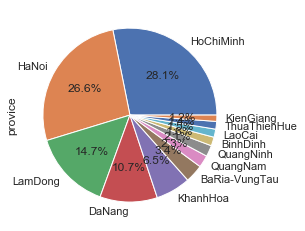

In [8]:
city.plot(kind='pie', autopct='%1.1f%%')

In [9]:
city = city.reset_index()
city = city.rename(columns={'index':'provice', 'provice': 'frequency'})
city['relative_frequency'] = city['frequency'] / city['frequency'].sum()
city['cummulative_frequency'] = city['relative_frequency'].cumsum()

In [10]:
 frequency_table(df['provice'])

,index,provice,relative_f,cummulative_f
0,HoChiMinh,2246,0.281489,0.281489
1,HaNoi,2120,0.265697,0.547186
2,LamDong,1174,0.147136,0.694323
3,DaNang,851,0.106655,0.800978
4,KhanhHoa,516,0.064670,0.865647
5,BaRia-VungTau,268,0.033588,0.899235
6,QuangNam,181,0.022685,0.921920
7,QuangNinh,166,0.020805,0.942725
8,BinhDinh,130,0.016293,0.959017
9,LaoCai,120,0.015039,0.974057


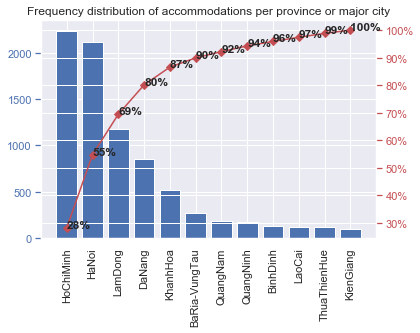

In [11]:
fix, ax1 = plt.subplots()
# ax1
ax1.bar(city['provice'], city['frequency'])
plt.xticks(rotation=90)
plt.title('Frequency distribution of accommodations per province or major city')
# ax2
ax2 = ax1.twinx()
ax2.plot(city['provice'], city['cummulative_frequency']*100, color='r', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
pct_format = '{0:.0%}'
formatted_weights = [pct_format.format(x) for x in city['cummulative_frequency']]
for i, txt in enumerate(formatted_weights):
    ax2.annotate(txt, (city['provice'][i], city['cummulative_frequency'][i]*100), fontweight='heavy')

# Set index color
ax1.tick_params(axis='y', colors='b')
ax2.tick_params(axis='y', colors='r')

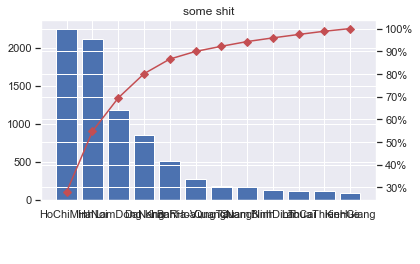

In [13]:
pareto_plot(df['provice'], title='some shit')

## Province
* 11 Provinces: 10341 accommodation

* Top 3:
    * HCM (2680_25.9%)
    * HaNoi (2608_25.2%)
    * LamDong (1492_14.5%)
    * Sum: 6788_65.6%
    
* Top 5:
    * + DaNang_BaRia-VungTau
    * Sum: 82.8%
    
_______________________

In [105]:
district = df['district'].value_counts()

In [11]:
provice_district = df['district'].groupby(df['provice']).value_counts()

Text(0.5, 1.0, 'Distribution of Districts in Top 3 Provice')

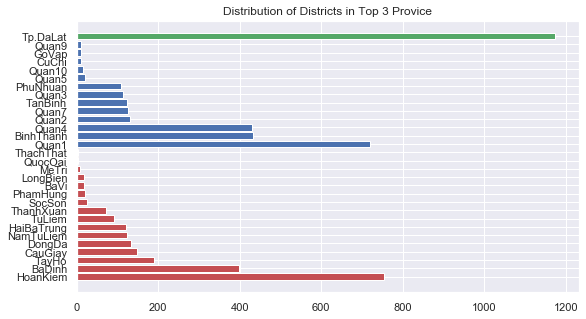

In [12]:
plt.figure(figsize=(9, 5))
for i,j in zip(provice_district.index, provice_district):
    if i[0] == 'HoChiMinh': 
        plt.barh(i[1], j, color='b')
    elif i[0] == 'HaNoi':
        plt.barh(i[1], j, color='r')
    elif i[0] =='LamDong':
        plt.barh(i[1], j, color='g')
plt.title('Distribution of Districts in Top 3 Provice')

### District 
* 50 Districts or cities

* Dalat: Biggest scale (1469)

* Toàn bộ nhà ở tập trung ở tp. Đà Lạt

* Urban: 
    * Càng gần trung tâm số lượng nhà ở càng nhiều
    
______________    

In [13]:
exp = df['exp_type'].value_counts()

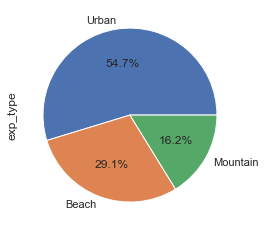

In [14]:
exp.plot.pie(autopct='%1.1f%%')

In [15]:
exp_province = pd.DataFrame(df['provice'].groupby(df['exp_type']).value_counts())

In [16]:
exp_province

provice
exp_type provice               
Beach    DaNang             851
         KhanhHoa           516
         BaRia-VungTau      268
         QuangNam           181
         QuangNinh          166
         BinhDinh           130
         ThuaThienHue       114
         KienGiang           93
Mountain LamDong           1174
         LaoCai             120
Urban    HoChiMinh         2246
         HaNoi             2120

Text(0, 0.5, '')

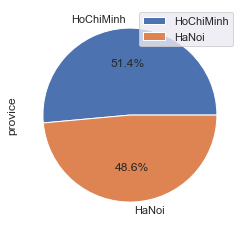

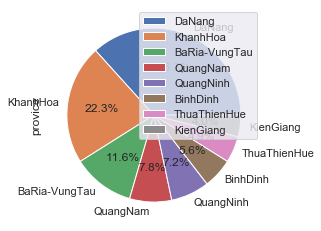

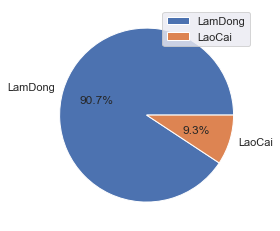

In [17]:
exp_province.loc['Urban'].plot.pie(y='provice', autopct='%1.1f%%')
exp_province.loc['Beach'].plot.pie(subplots=True, autopct='%1.1f%%')
exp_province.loc['Mountain'].plot.pie(subplots=True, autopct='%1.1f%%')
plt.ylabel('')

## Experince Type
* Urban: highest relative frequency (51.1%) - #-2: Beach - #-3: Mountain
* Beach experience has the most vairous options (8-location), Urban_Mountain (2-location)
_______________

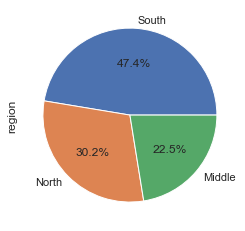

In [18]:
df['region'].value_counts().plot.pie(autopct='%1.1f%%')

In [19]:
provice_region = pd.DataFrame(df['provice'].groupby(df['region']).value_counts())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000193ECC2E708>],
      dtype=object)

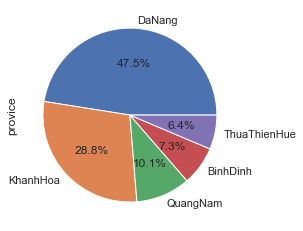

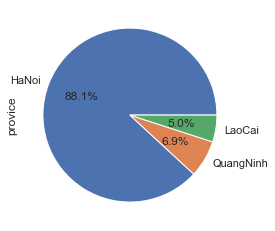

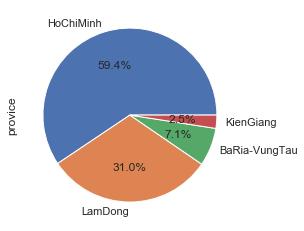

In [20]:
provice_region.loc['Middle'].plot.pie(subplots=True, autopct='%1.1f%%', legend=None)
provice_region.loc['North'].plot.pie(subplots=True, autopct='%1.1f%%', legend=None)
provice_region.loc['South'].plot.pie(subplots=True, autopct='%1.1f%%', legend=None)

## Region (Middle/ North/ South)
* South: has most accommodations(48.1%)/ North(29.3%)/ Middle(22.6%)
* Middle: has most locations(6)/ South(4)/ North(2)
* Middle: every provice is beach-experince/ South and North have all three experience
____________

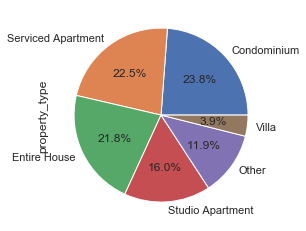

In [21]:
df['property_type'].value_counts().plot.pie(autopct='%1.1f%%')

In [22]:
x = df['property_type'].groupby(df['provice']).value_counts()
# for i, j in zip(x.index, x):
#       print(i, ":", j)

In [23]:
x = pd.DataFrame(df['property_type'].groupby(df['exp_type']).value_counts())

In [24]:
x

property_type
exp_type property_type                    
Beach    Serviced Apartment            604
         Entire House                  497
         Condominium                   461
         Studio Apartment              315
         Other                         313
         Villa                         129
Mountain Entire House                  652
         Other                         270
         Villa                         135
         Serviced Apartment            125
         Studio Apartment               71
         Condominium                    41
Urban    Condominium                  1399
         Serviced Apartment           1070
         Studio Apartment              893
         Entire House                  590
         Other                         366
         Villa                          48

Text(0.5, 1.0, 'Mountain')

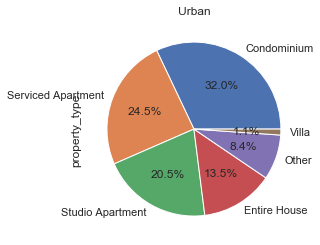

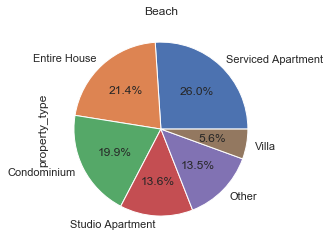

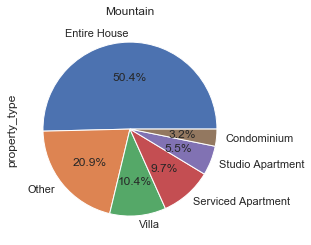

In [25]:
x.loc['Urban'].plot.pie(subplots=True, autopct='%1.1f%%', legend=None)
plt.title('Urban')
x.loc['Beach'].plot.pie(subplots=True, autopct='%1.1f%%', legend=None)
plt.title('Beach')
x.loc['Mountain'].plot.pie(subplots=True, autopct='%1.1f%%', legend=None)
plt.title('Mountain')

## Property_type
* 6 type of property
* Condonminium is the most(23.6%)_ Villa is at least(9.2%)
* Every provice has all 6 type of property, except:
    * LaoCai (Serviced apartment)
    * QuangNam (Condominium)

* Every exp_type has all 6 type of perperty expand:
    * Urban: the biggest relative frequency is apartment type (condominium/ serviced & studio)
    * Mountain: in other hand of Urban, apartment type is at least/ the biggest relative frequency is entire house.
    * Beach: the relative frequency is quite nicely balanced. But focus on high quality accommodation.
_______________

Text(0.5, 1.0, 'Imbalanced Data')

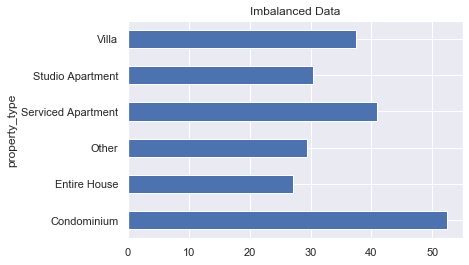

In [26]:
price_pro = df['checkin_price'].groupby(df['property_type'])
price_pro.mean().plot.barh()
plt.title('Imbalanced Data')

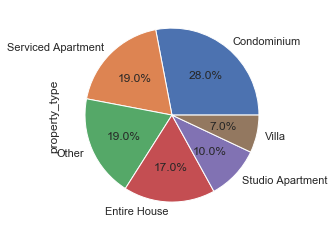

In [27]:
# Random Sampling
pro_price_f = df[['property_type', 'checkin_price']]
len_ = len(pro_price_f)
sampler = np.random.permutation(len_)
pro_price_f.take(sampler[:100])['property_type'].value_counts().plot.pie(autopct='%1.1f%%')
pro_price_f = pro_price_f.take(sampler[:100])

Text(0.5, 1.0, 'Permutation set')

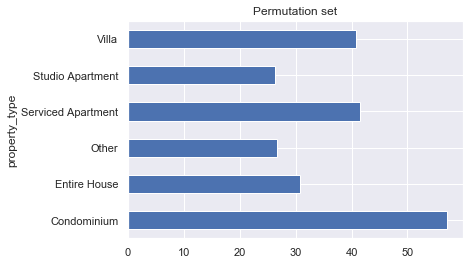

In [28]:
pro_price_f['checkin_price'].groupby(pro_price_f['property_type']).mean().plot.barh()
plt.title('Permutation set')

## Checkin_price:
* Condominium is the most expensive and Entire_house is cheapest.
    * Condominium tập trung ở vùng Urban, nên nó có giá cao.
    * Nhưng tập dữ liệu này thiều cân bằng nên đây là con sô thiếu độ tin tưởng.
   


<BarContainer object of 5 artists>

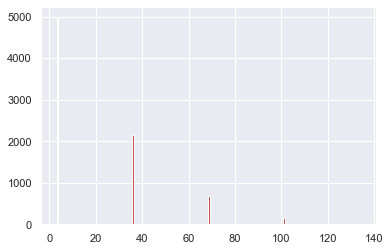

In [43]:
num_bins = 5
samples_per_bin = 200
hist, bins = np.histogram(df['checkin_price'], num_bins)
center = (bins[:-1] + bins[1:]) * .5
plt.bar(bins[:-1], hist, color='r')

(array([1.654e+03, 3.331e+03, 1.248e+03, 8.960e+02, 4.950e+02, 1.840e+02,
        9.800e+01, 5.600e+01, 1.400e+01, 3.000e+00]),
 array([  3.46 ,  19.775,  36.09 ,  52.405,  68.72 ,  85.035, 101.35 ,
        117.665, 133.98 , 150.295, 166.61 ]),
 <a list of 10 Patch objects>)

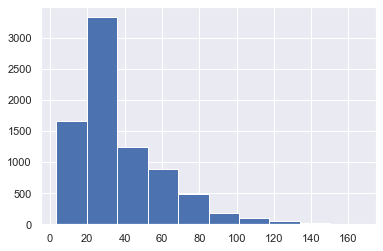

In [39]:
plt.hist(df['checkin_price'])